**Artificial Neural networks**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
data=pd.read_csv('https://raw.githubusercontent.com/ygtech27/Datasets/refs/heads/main/Alphabets_data.csv')
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


**Data Exploration and Preprocessing**

In [4]:
data.info()
data.isnull().sum()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


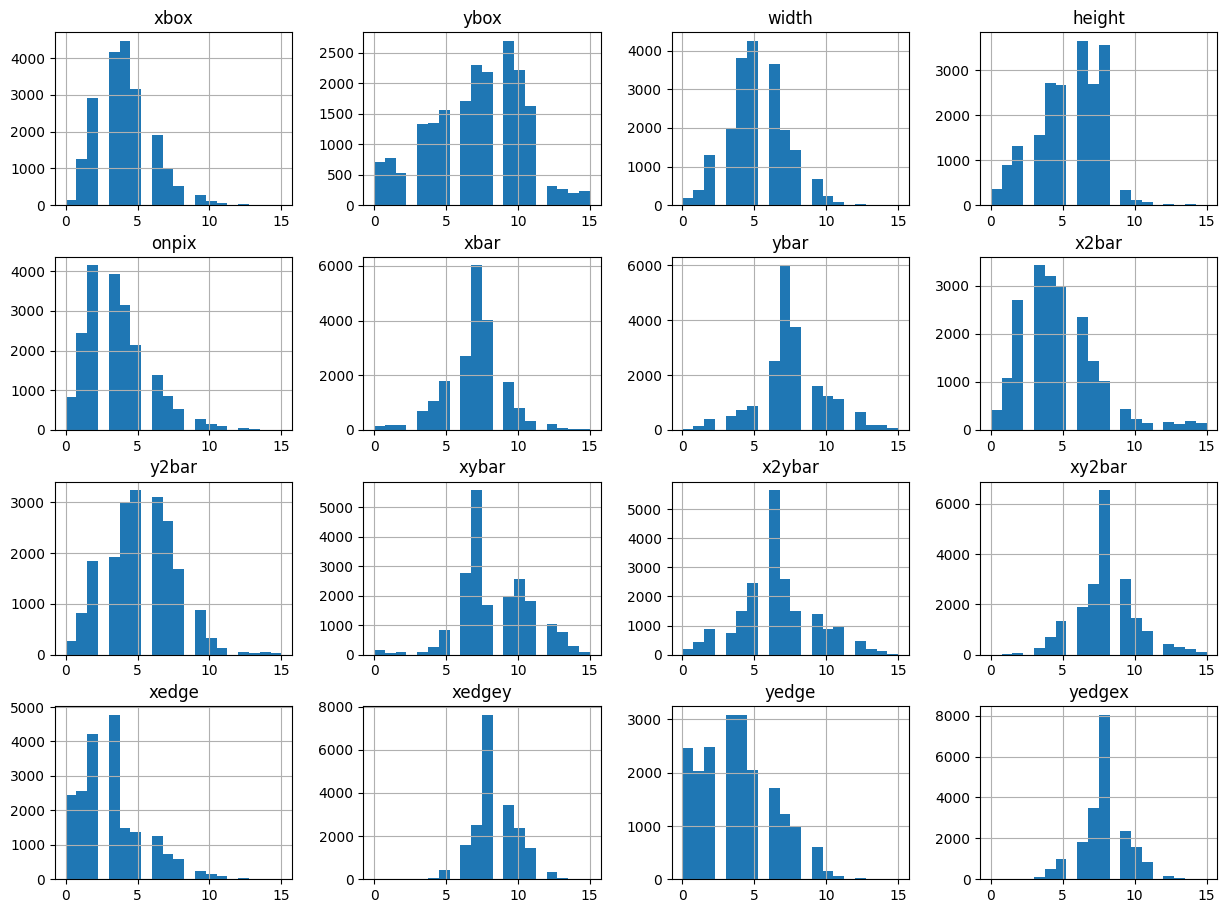

In [5]:
data.hist(bins=20,figsize=(15,11))
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
le=LabelEncoder()
data['letter']=le.fit_transform(data['letter'])
features=data.drop('letter',axis=1)
se=StandardScaler()
se.fit_transform(features)

array([[-1.0576983 ,  0.29187713, -1.05327668, ..., -0.21908163,
        -1.4381527 ,  0.12291107],
       [ 0.51038497,  1.5023577 , -1.05327668, ..., -0.21908163,
         0.12008142,  1.35944092],
       [-0.01230945,  1.19973756,  0.43590966, ..., -0.8656262 ,
        -0.26947711,  0.74117599],
       ...,
       [ 1.03307939,  0.59449727,  0.43590966, ...,  2.36709667,
        -0.65903564, -2.35014863],
       [-1.0576983 , -1.22122359, -0.55688123, ...,  0.42746295,
         0.50963994,  0.12291107],
       [-0.01230945,  0.59449727,  0.43590966, ..., -0.8656262 ,
        -0.65903564,  0.12291107]])

In [7]:
target=data['letter']
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler

**Model Implementation**

In [8]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,validation_split=0.33,epochs=20,batch_size=20)

Epoch 1/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0371 - loss: -47157.0078 - val_accuracy: 0.0411 - val_loss: -824524.6875
Epoch 2/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0379 - loss: -1754667.1250 - val_accuracy: 0.0411 - val_loss: -6354557.5000
Epoch 3/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0397 - loss: -9064335.0000 - val_accuracy: 0.0411 - val_loss: -19654728.0000
Epoch 4/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0344 - loss: -24893168.0000 - val_accuracy: 0.0411 - val_loss: -42539664.0000
Epoch 5/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0345 - loss: -50314284.0000 - val_accuracy: 0.0411 - val_loss: -76197944.0000
Epoch 6/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0402 - loss: -86295336.0000 - val_accuracy: 0.0411 - val_loss: -121442400.0000
Epoch 7/20
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0381 - loss: -135252672.0000 - val_accuracy: 0.0411 - val_loss: -178930336.00

In [9]:
score=model.evaluate(x_train,y_train)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0380 - loss: -2374096384.0000


In [10]:
score

[-2362181376.0, 0.03831249848008156]

**Hyperparameter Tuning**

In [11]:
!pip install tensorflow keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00


In [12]:
import tensorflow as tf
from kerastuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=128, step=16), activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(units=hp.Int('units2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='my_dir', project_name='alphabet_tuning')

tuner.search(x_train, y_train, epochs=50, validation_split=0.2)

Trial 5 Complete [00h 03m 17s]
val_accuracy: 0.04312499985098839

Best val_accuracy So Far: 0.04312499985098839
Total elapsed time: 00h 16m 39s


In [15]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units1: {best_hps.get('units1')}, Best units2: {best_hps.get('units2')}, Best learning_rate: {best_hps.get('learning_rate')}")

Best units1: 64, Best units2: 16, Best learning_rate: 0.0001


In [16]:
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0357 - loss: 0.0000e+00 - val_accuracy: 0.0431 - val_loss: 0.0000e+00
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0346 - loss: 0.0000e+00 - val_accuracy: 0.0431 - val_loss: 0.0000e+00
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0367 - loss: 0.0000e+00 - val_accuracy: 0.0431 - val_loss: 0.0000e+00
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0367 - loss: 0.0000e+00 - val_accuracy: 0.0431 - val_loss: 0.0000e+00
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0390 - loss: 0.0000e+00 - val_accuracy: 0.0431 - val_loss: 0.0000e+00
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0374 - loss: 0.0000e+00 - val_accuracy: 0.0431 - val_loss: 0.0000e+00
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0367 - loss: 0.0000e+00 - val_accuracy: 0.0431 - val_loss: 0.0000e+00
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/s

**Evaluation**


In [17]:
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0435 - loss: 0.0000e+00
Test Accuracy: 0.03824999928474426
